## MNIST DATASET

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [16]:
(train_img,train_lab), (test_img,test_lab) = mnist.load_data()

In [17]:
# data Preprocessing

#normalizing the pixel values to the range [0,1]

train_img = train_img/255
test_img = test_img/255

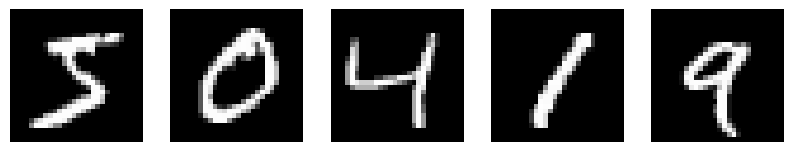

In [18]:
# for ploting the imgs or datasets you have inserted

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(train_img[i],cmap='gray')
    plt.axis('off')
plt.show()


## cifar10 and cifar100 (req internet)

In [19]:
from tensorflow.keras.datasets import cifar10, cifar100

(train_img,train_lab), (test_img,test_lab) = cifar10.load_data()

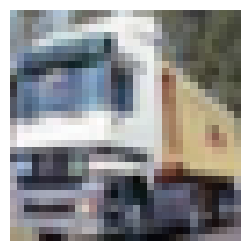

In [20]:
plt.figure(figsize=(3,3))
plt.imshow(train_img[1])
plt.axis('off')
plt.show()

## Own IMG DataSet Importing

In [21]:
# first arrenge you images properly at its location

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [26]:
# now define batch size and target img size
batch_size = 32
target_size = (150,150)

# now take img from your dir loaction to generator

train_data = datagen.flow_from_directory(
    'C:\\Users\\naman\\Downloads\\mydata',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' #use 'categorical' for multi class
)

test_data = datagen.flow_from_directory(
    'C:\\Users\\naman\\Downloads\\mydata',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' #use 'categorical' for multi class
)



Found 652 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [27]:
# Extract a batch of training data and labels from train_data generator
train_batch = next(train_data)
train_img, train_lab = train_batch

# Extract a batch of test/validation data and labels from test_data generator
test_batch = next(test_data)
test_img, test_lab = test_batch


## CSV file dataset imporing

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [48]:
# Load CSV file into a DataFrame
data = pd.read_csv('../movie_reviews.csv')

In [49]:
print(data.head())

    Movie Title Review Text Sentiment
0      3 idiots  bhut bdiya   neutral
1  Total Dhamal       bekar  positive
2           MIB  bhut bdiya   neutral
3           MIB        okay  positive
4           MIB       bekar  positive


In [55]:
# preprocessing

# Example preprocessing steps
data.fillna(0, inplace=True)  # Fill missing values with 0

# data = pd.get_dummies(data, columns=['Sentiment']) 
# One-hot encode categorical variables



In [56]:
print(data.head())

    Movie Title Review Text Sentiment
0      3 idiots  bhut bdiya   neutral
1  Total Dhamal       bekar  positive
2           MIB  bhut bdiya   neutral
3           MIB        okay  positive
4           MIB       bekar  positive


In [57]:
# Extract features (inputs) and labels (outputs)
X = data.drop('Sentiment', axis=1)  # Features (inputs)
y = data['Sentiment']  # Labels (outputs)


In [63]:
# fro converting text data to numrical value (for words)
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Fit label encoder and transform sentence
encoded_sentence = label_encoder.fit_transform(y)

print(encoded_sentence)

[1 2 1 2 2 2 2 0 1 2 2 0 1 0 2 2 2 2 2 0 2 1 1 1 2 2 1 2 1 1 2 0 0 0 2 2 0
 2 2 0 1 1 2 1 0 0 1 0 1 1 0 1 2 2 1 0 0 1 1 0 2 1 2 1 2 1 0 1 0 2 0 0 1 1
 2 0 2 2 2 1 2 0 2 1 0 2 0 1 2 2 2 1 0 2 2 2 2 0 1 1 0 2 0 0 0 0 0 0 1 1 0
 0 0 1 2 2 2 0 2 0 2 1 1 0 2 2 2 2 2 1 0 2 1 2 1 0 2 2 1 0 1 1 0 2 2 1 0 0
 2 2]


In [62]:
# for sententcen encoding
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X)
encoded_sentences = tokenizer.texts_to_matrix(X, mode='binary')

print(encoded_sentences)


[[0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1.]]


In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
